In [3]:
import sqlite3
import os
import polars as pl
import plot
import matplotlib.pyplot as plt
import numpy as np

## Connect + Read from Database

### Set connection parameters

In [4]:
db_dir = "/scratch/aneeshr/concurrent-quit/results/db"
db_name = "db_june18"
db_path = db_dir + "/" + db_name

In [5]:
connection = sqlite3.connect(db_path)

### Set the date/timestamp to read

In [6]:
date_to_read = "2025-06-18"

In [7]:
read_index_bench_query = f"SELECT * from index_bench where timestamp > {date_to_read};"

### Read the data

In [8]:
df = pl.read_database(
    query = read_index_bench_query, 
    connection = connection)

### Sample Read Data

In [12]:
filter_col = "index_type"
filter_predicate = "concurrent_quit"

In [13]:
sample_filtered_result = df.filter(pl.col(filter_col) == filter_predicate)

In [24]:
sample_filtered_result

id,timestamp,index_type,workload_file,N,K,L,threads,preload_time,raw_writes_time,raw_reads_time,mixed_time,updates_time,short_range_time,mid_range_time,long_range_time,size,height,internal,leaves,fast_inserts,redistribute,soft_resets,hard_resets,fast_inserts_fail,sort
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,"""2025-06-19 00:39:22.912216+00:…","""concurrent_quit""","""5_0_0""",5,0,0,1,834369466,0,0,0,111015322,0,0,0,5000000,2,39,10000,4990000,0,0,0,10000,0
2,"""2025-06-19 00:39:26.764849+00:…","""concurrent_quit""","""5_5_100""",5,5,100,1,1288439722,0,0,0,120119497,0,0,0,5000000,2,52,13982,4579826,0,0,7839,12889,0
3,"""2025-06-19 00:39:31.376638+00:…","""concurrent_quit""","""5_50_100""",5,50,100,1,1886039259,0,0,0,173093891,0,0,0,5000000,2,52,16322,2664612,0,0,19680,9454,0
7,"""2025-06-19 00:39:57.591997+00:…","""concurrent_quit""","""5_0_0""",5,0,0,2,2047258626,0,0,0,210196223,0,0,0,5000000,2,39,9994,4988304,0,0,0,9994,0
8,"""2025-06-19 00:40:03.079715+00:…","""concurrent_quit""","""5_5_100""",5,5,100,2,2882230066,0,0,0,196755886,0,0,0,5000000,2,52,14008,4570923,0,0,7790,12881,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
14,"""2025-06-19 00:40:45.076854+00:…","""concurrent_quit""","""5_5_100""",5,5,100,4,4710735358,0,0,0,245472150,0,0,0,5000000,2,52,14032,4502335,0,0,7829,75202,0
15,"""2025-06-19 00:40:51.770693+00:…","""concurrent_quit""","""5_50_100""",5,50,100,4,3722446202,0,0,0,169452127,0,0,0,5000000,2,51,16310,2656168,0,0,19639,10152,0
19,"""2025-06-19 00:41:28.571417+00:…","""concurrent_quit""","""5_0_0""",5,0,0,8,4390121924,0,0,0,303295833,0,0,0,5000000,2,38,9953,4970478,0,0,0,9953,0


## Analysis

### Preload times

In [15]:
reset_df = df.select(
            pl.col("index_type"),
            pl.col("K"),
            pl.col("threads"),
            pl.col("soft_resets"),
            pl.col("hard_resets")
)
reset_df = reset_df.filter((pl.col("index_type")=="concurrent_quit_appends") & (pl.col("K")==5))
reset_df

index_type,K,threads,soft_resets,hard_resets
str,i64,i64,i64,i64
"""concurrent_quit_appends""",5,1,0,7759
"""concurrent_quit_appends""",5,2,0,7797
"""concurrent_quit_appends""",5,4,0,7993
"""concurrent_quit_appends""",5,8,0,7772


In [20]:
preload_df = df.select(
                pl.col("index_type"), 
                pl.col("K"),
                pl.col("threads"),
                pl.col("updates_time")
)

In [21]:
num_ops = 5e6
div_factor = num_ops * 1000
preload_df = preload_df.with_columns((div_factor/pl.col("updates_time")).alias("throughput"))
preload_df

index_type,K,threads,updates_time,throughput
str,i64,i64,i64,f64
"""concurrent_quit""",0,1,111015322,45.038828
"""concurrent_quit""",5,1,120119497,41.625216
"""concurrent_quit""",50,1,173093891,28.886057
"""concurrent_quit_appends""",0,1,115072054,43.451036
"""concurrent_quit_appends""",5,1,122209249,40.913434
…,…,…,…,…
"""concurrent_quit""",5,8,286051954,17.479342
"""concurrent_quit""",50,8,176814530,28.278219
"""concurrent_quit_appends""",0,8,307603352,16.254699


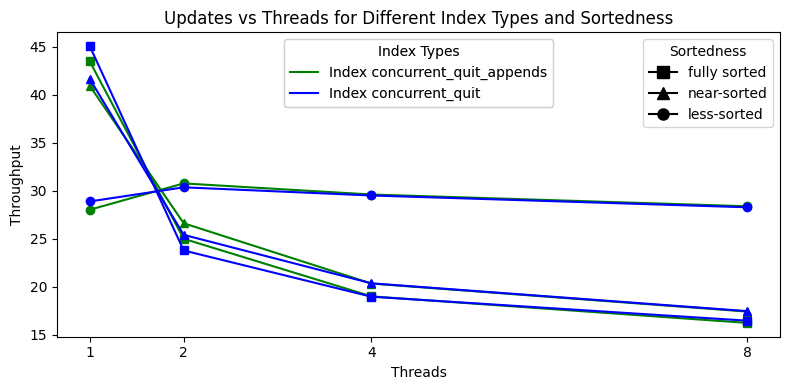

In [23]:
index_types = preload_df["index_type"].unique().to_list()
k_values = sorted(preload_df["K"].unique().to_list())
thread_values = sorted(preload_df["threads"].unique().to_list())

colors = {"concurrent_simple": "grey", "concurrent_quit": "blue", "concurrent_quit_appends": "green"}
markers = {k: ['s', '^', 'o'][i % 3] for i, k in enumerate(k_values)}
sortedness_values = {0: "fully sorted", 5: "near-sorted", 50: "less-sorted"}

plt.figure(figsize=(8, 4))
lines = []
labels = []
for index in index_types:
    # Filter DataFrame by the current index type
    index_df = preload_df.filter(pl.col("index_type") == index).sort(["K", "threads"])
    # Iterate through each K value
    for k in k_values:
        # Filter DataFrame by the current K value
        k_df = index_df.filter(pl.col("K") == k).sort("threads")
        # Plot preload time against threads for this specific index type and K
        line, =plt.plot(k_df["threads"], k_df["throughput"],
                 label=f'K={k}',
                 color=colors[index],
                 marker=markers[k],
                 linestyle='-')
        lines.append(line)
        labels.append(f'{sortedness_values[k]}')

# Set x-axis ticks and label
plt.xticks(thread_values)
plt.xlabel("Threads")
# Set y-axis label
plt.ylabel("Throughput")
# Set plot title
plt.title("Updates vs Threads for Different Index Types and Sortedness")
# Add legend

# legend_k_handles = [plt.plot([], [], marker=markers[k], linestyle='-', color='gray', label=f'K={k}')[0] for k in k_values]
# plt.legend(handles=legend_k_handles, title='K Values', loc='upper right')

# # Create a separate legend for Index Types using proxy artists
# legend_index_handles = [plt.plot([], [], color=colors[index], label=f'{index}')[0] for index in index_types]
# plt.legend(handles=legend_index_handles, loc='upper right')

# Create a separate legend for K values (proxy artists)
marker_handles = [plt.Line2D([0], [0], marker=markers[k], color='k', linestyle='-', markersize=8, label=f'{sortedness_values[k]}') for k in k_values]
legend2 = plt.legend(handles=marker_handles, title='Sortedness', loc='upper right')
plt.gca().add_artist(legend2) # Add the second legend to the current axes

# Create a separate legend for Index Types (proxy artists)
color_handles = [plt.Line2D([0], [0], color=colors[index], linestyle='-', label=f'Index {index}') for index in index_types]
legend3 = plt.legend(handles=color_handles, title='Index Types', loc='upper center')
plt.gca().add_artist(legend3) # Add the third legend to the current axes

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Show the plot
# plt.show()
plt.savefig("updates-june18.pdf")

# Old

In [20]:
# fetch index types
index_types = df["index_type"].unique().to_list()

# filter and group dfs by index types
grouped_dfs = {}
for index in index_types:
    filtered_df = preload_df.filter(pl.col("index_type") == index).sort("K")
    grouped_dfs[index] = filtered_df

k_values = sorted(preload_df["K"].unique().to_list())

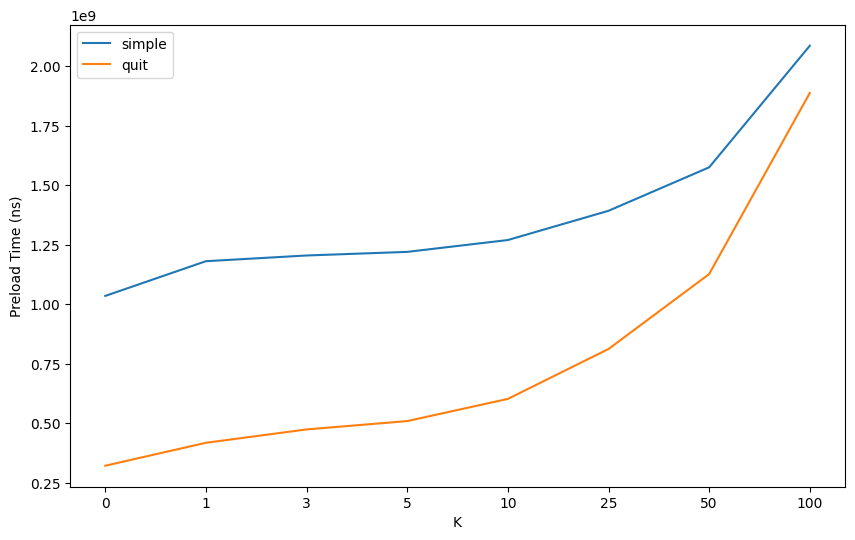

In [21]:
x_positions = np.arange(len(k_values))

plt.figure(figsize=(10,6))

for index, index_df in grouped_dfs.items():
    plt.plot(x_positions, index_df["preload_time"], label=index)

plt.xticks(x_positions, k_values)
plt.xlabel("K")
plt.ylabel("Preload Time (ns)")
plt.legend()
plt.show()